In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import openai
import yaml

from utils import *

import autoKG_full as AKG

In [2]:
with open("config.yaml", 'r') as stream:
    try:
        params = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)


COMPLETIONS_MODEL = params["OPENAI_API_MODEL"]
EMBEDDING_MODEL = params["EMBEDDING_MODEL"]
my_api_key = params["OPENAI_API_KEY"]
openai.api_key = my_api_key

os.environ['OPENAI_API_KEY'] = my_api_key
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

In [3]:
KG_class_chat = AKG.autoKG(texts=None,
                           source=None,
                           embedding_model=EMBEDDING_MODEL,
                           llm_model=COMPLETIONS_MODEL,
                           openai_api_key=OPENAI_API_KEY,
                           main_topic=None,
                           embedding=False)

In [4]:
KG_class_chat.load_data(os.path.join('KG_data', 'ref_paper_KG.npy'), include_texts=True)

Successfully load from KG_data/ref_paper_KG.npy


In [5]:
questions = [
    f"""Why is it better to formulate Bayesian inverse problems on infinite-dimensional function spaces rather than directly on finite grids?""",

    f"""How does Ensemble Kalman Inversion (EKI) determine descent directions without calculating gradients of the forward model?""",

    f"""How does a Gaussian process prior conceptually act as a regularization term in inverse problems?""",

    f"""What is the 'subspace property' in ensemble methods and why is it a limitation?"""
]

In [ ]:
query = questions[0]
record = KG_class_chat.KG_prompt(query,
                                 search_nums=(15, 7, 3, 4, 2),
                                 search_mtd='pair_dist',
                                 use_u=False)
response, keywords_info, ref_info, all_tokens = KG_class_chat.completion_from_record(
                               record,
                               output_tokens=1024,
                               prompt_language='English',
                               show_prompt=False,
                               prompt_keywords=False,
                               include_source=False,
                               )

In [7]:
from IPython.display import display, Markdown

# 1. Print tokens (raw text)
print(f"Token Usage: {all_tokens}")

# 2. Render Markdown
display(Markdown(query))
display(Markdown(response))


Token Usage: 7456


Why is it better to formulate Bayesian inverse problems on infinite-dimensional function spaces rather than directly on finite grids?

Formulating Bayesian inverse problems on infinite-dimensional function spaces rather than directly on finite grids is advantageous for several key reasons:

1. **Discretization Invariance and Flexibility:**  
   Infinite-dimensional formulations allow the solution to be defined as a function over a continuous domain rather than just at discrete points. This means that the Bayesian inverse problem solution can be evaluated at any point in the domain, not only on a fixed finite grid. As a result, the solution is *discretization-invariant*—it can transfer seamlessly between different grid geometries and resolutions without needing to be recomputed or re-parameterized for each discretization (see text: "To be discretization-invariant, the neural operator can produce an answer u(x) for any x ∈ D, potentially x ∉ Dj. Such a property is highly desirable as it allows a transfer of solutions between different grid geometries and discretizations").

2. **Handling High or Infinite Dimensionality Naturally:**  
   Many inverse problems involve unknowns that are functions (e.g., fields, initial conditions) rather than finite-dimensional vectors. Modeling these unknowns in infinite-dimensional Banach or Hilbert spaces reflects the true nature of the problem and avoids artificial dimensionality reduction or truncation. This is important because the state dimension in discretized problems can be extremely large (on the order of 10^9 or more), and increasing computational power tends to push for finer discretizations (text: "In practice, the field will be discretized and represented as a high-dimensional vector... the state dimension can be of order 10^9... it is important to understand infinite dimensional problems, and sequences of approximating finite-dimensional problems which approach the infinite-dimensional limit").

3. **Mathematical and Statistical Rigor:**  
   Infinite-dimensional Bayesian formulations provide a rigorous framework that ensures well-defined posterior distributions even as discretization is refined. This framework clarifies important properties such as absolute continuity of the posterior with respect to the prior, which is linked to the concept of *intrinsic dimension* rather than the nominal dimension of the discretized space (text: "The main result... shows the equivalence between (i) finite intrinsic dimension, (ii) absolute continuity of the posterior with respect to the prior, and (iii) the central quantity p being finite... this dimension can be finite even when the inverse problem is posed in an infinite-dimensional Hilbert space").

4. **Avoiding Curse of Dimensionality and Ensuring Stability:**  
   Directly working on finite grids with very high dimension can lead to computational and statistical challenges, such as degeneracy of importance sampling or singular limits where the posterior and prior become mutually singular. Infinite-dimensional formulations help identify intrinsic problem dimensions and regularization properties that govern the problem’s complexity and stability (text: "Performance is controlled by an intrinsic dimension, as opposed to the state space or data dimensions... varying parameters related to nominal dimension, noise size, and prior regularity may cause a breakdown of absolute continuity").

5. **Unified Parameterization Across Discretizations:**  
   By conceptualizing the problem in infinite-dimensional spaces, all finite-dimensional approximations share a common set of parameters defined in the infinite-dimensional setting. This enables consistent learning and inference across discretizations without re-deriving or re-training models for each grid (text: "This means that all finite-dimensional approximations can share a common set of network parameters which are defined in the (approximation-free) infinite-dimensional setting").

In summary, formulating Bayesian inverse problems on infinite-dimensional function spaces provides a mathematically sound, flexible, and computationally robust framework that naturally accommodates the continuous nature of the unknowns, supports discretization-invariant solutions, and enables better understanding and control of problem complexity through intrinsic dimension concepts.

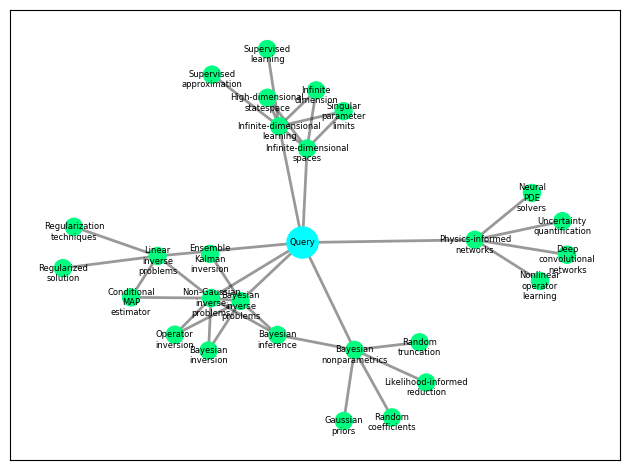

<Figure size 640x480 with 0 Axes>

In [8]:
KG_class_chat.draw_graph_from_record(record,
                                     node_colors=([0, 1, 1], [0, 1, 0.5], [1, 0.7, 0.75]),
                                     node_shape='o',
                                     edge_color='black',
                                     edge_widths=(2, 0.5),
                                     node_sizes=(500, 150, 50),
                                     font_color='black',
                                     font_size=6,
                                     show_text=False,
                                     save_fig=True,
                                     save_path='KG_outputs/Subgraph_vis.png')


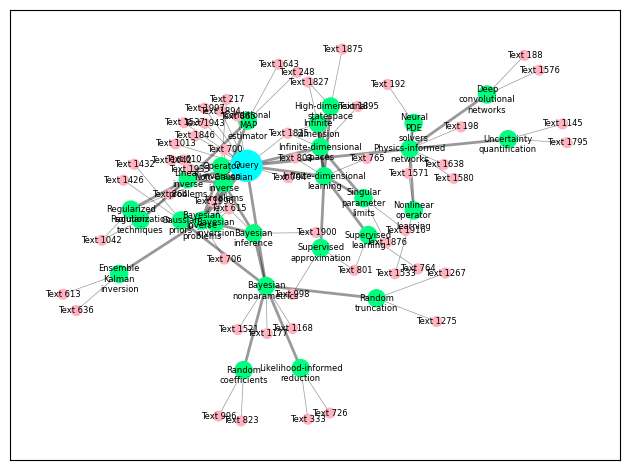

<Figure size 640x480 with 0 Axes>

In [9]:
KG_class_chat.draw_graph_from_record(record,
                                     node_colors=([0, 1, 1], [0, 1, 0.5], [1, 0.7, 0.75]),
                                     node_shape='o',
                                     edge_color='black',
                                     edge_widths=(2, 0.5),
                                     node_sizes=(500, 150, 50),
                                     font_color='black',
                                     font_size=6,
                                     show_text=True,
                                     save_fig=True,
                                     save_path='KG_outputs/Subgraph_vis_text.png')